In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
from imgaug import BoundingBox, BoundingBoxesOnImage, SegmentationMapsOnImage

from cp_utils.cp_dir_file_ops import get_project_path, read_pkl
from cp_utils.create_img_from_chars import get_char_mask_by_color

In [2]:
project_path = get_project_path()
mnistiseg_root_path = os.path.join(project_path, 'datasets', 'mnistiseg', 'resources')
subsets = ['train', 'val']

for subset in subsets:
    print('Subset:', subset)
    subset_imgs_fp = os.path.join(mnistiseg_root_path, subset)
    subset_imgs_list = os.listdir(subset_imgs_fp)
    subset_bboxes_fp = os.path.join(mnistiseg_root_path, f'{subset}_bboxes.pkl')
    subset_bboxes = read_pkl(subset_bboxes_fp)
    subset_cat_ids_fp = os.path.join(mnistiseg_root_path, f'{subset}_cat_ids.pkl')
    subset_cat_ids = read_pkl(subset_cat_ids_fp)
    subset_colors_fp = os.path.join(mnistiseg_root_path, f'{subset}_colors.pkl')
    subset_colors = read_pkl(subset_colors_fp)

    print('Total images', len(subset_imgs_list))
    print('Total bboxes', len(subset_bboxes))
    print('Total cat_ids', len(subset_cat_ids))
    print('Total colors', len(subset_colors))


Subset: train
Total images 4000
Total bboxes 4000
Total cat_ids 4000
Total colors 4000
Subset: val
Total images 1000
Total bboxes 1000
Total cat_ids 1000
Total colors 1000


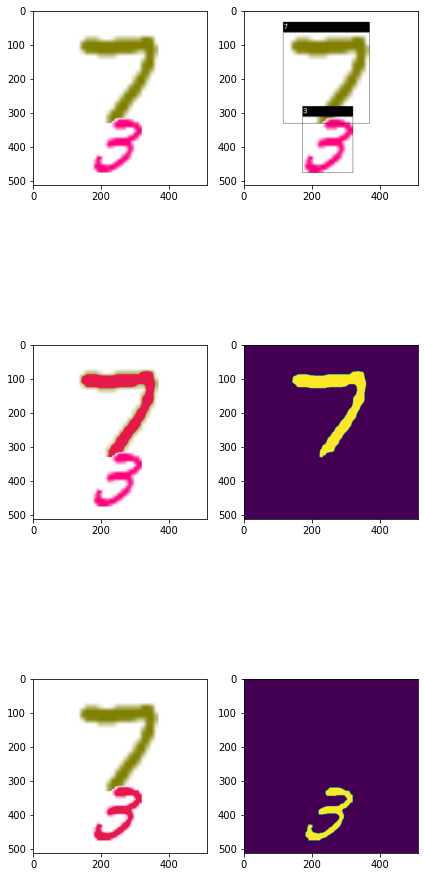

In [3]:

idx = np.random.choice(len(subset_imgs_list))
subset_img_path = os.path.join(subset_imgs_fp, subset_imgs_list[idx])
subset_img = plt.imread(subset_img_path)

bboxes_test = subset_bboxes[idx]
cat_ids_test = subset_cat_ids[idx]
colors_test = subset_colors[idx]

ia_bboxes_all = []
for bbox, label in zip(bboxes_test, cat_ids_test):
    ia_bbox = BoundingBox(y1=bbox[0], x1=bbox[1], y2=bbox[2], x2=bbox[3], label=label)
    ia_bboxes_all.append(ia_bbox)
ia_bboxes = BoundingBoxesOnImage(ia_bboxes_all, shape=subset_img.shape)
new_img_wi_bbs = ia_bboxes.draw_on_image(subset_img, color=(0, 0, 0))

fig, ax = plt.subplots(len(bboxes_test) + 1, 2, figsize=(6, 15))
ax[0, 0].imshow(subset_img)
ax[0, 1].imshow(new_img_wi_bbs)

for i in range(len(colors_test)):
    arr = get_char_mask_by_color(subset_img, bboxes_test[i], colors_test[i])
    segmap = SegmentationMapsOnImage(arr=arr, shape=subset_img.shape)
    new_img = segmap.draw_on_image(subset_img, alpha=1)[0]
    ax[i + 1, 0].imshow(new_img)
    ax[i + 1, 1].imshow(arr)

plt.tight_layout()
plt.show()

In [4]:
# exit()